In [10]:
# python prerequisities

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
%config Completer.use_jedi = False

sns.set(font_scale=2,
        style="ticks",
        rc={
            "axes.titlesize": 24,
            "axes.labelsize": 20,
            'xtick.labelsize': 20,
            'ytick.labelsize': 20
        })

In [55]:
def readCsv(filename, offset, source, hardware):
    
    run = pd.read_csv(filename, delimiter=",", index_col=0)
    run["Time"] = pd.to_datetime(run["Time"], infer_datetime_format=True)  + offset
    run["Speed_rolling_5s"] = run["Speed"].rolling(5).mean()
    run["Speed_rolling_10s"] = run["Speed"].rolling(10).mean()
    run["Speed_rolling_15s"] = run["Speed"].rolling(15).mean()
    run["source"] = source
    run["hardware"] = hardware
    
    return run


In [56]:
run = {}

# gps+fp
run[1] = {}
run[1]["g"] = readCsv("2-csv/forerunner-82911648.csv", pd.DateOffset(hours=1), "garmin", "gps+footpod")
run[1]["p"] = readCsv("2-csv/polar2021-10-24_18-46-22.csv", pd.DateOffset(hours=-2,seconds=28), "polar", "gps+footpod")


# gps only
run[2] = {}
run[2]["g"] = readCsv("2-csv/forerunner-82912399.csv", pd.DateOffset(hours=1), "garmin", "gps")
run[2]["p"] = readCsv("2-csv/polar2021-10-24_18-58-31.csv", pd.DateOffset(hours=-2,seconds=28), "polar", "gps")


# fp only
run[3] = {}
run[3]["g"] = readCsv("2-csv/forerunner-82912973_mod.csv", pd.DateOffset(hours=1), "garmin", "footpod")
run[3]["p"] = readCsv("2-csv/polar2021-10-24_19-11-09.csv", pd.DateOffset(hours=-2,seconds=28), "polar", "footpod")


run[1]["g"].head(5)

,Latitude,Longitude,Altitude,Speed,Heartrate,Date,Time,Speed_rolling_5s,Speed_rolling_10s,Speed_rolling_15s,source,hardware
No,,,,,,,,,,,,
1,52.131829,21.071362,114.0,0.00,87,2021/11/23,2021-11-25 18:46:51,NaN,NaN,NaN,garmin,gps+footpod
2,52.131834,21.071362,114.0,0.48,89,2021/11/23,2021-11-25 18:46:52,NaN,NaN,NaN,garmin,gps+footpod
3,52.131837,21.071363,114.0,0.39,89,2021/11/23,2021-11-25 18:46:53,NaN,NaN,NaN,garmin,gps+footpod
4,52.131837,21.071374,113.8,0.75,89,2021/11/23,2021-11-25 18:46:54,NaN,NaN,NaN,garmin,gps+footpod
5,52.131832,21.071419,113.8,3.09,91,2021/11/23,2021-11-25 18:46:55,0.942,NaN,NaN,garmin,gps+footpod


In [44]:
run[1]["p"].head(5)

,Latitude,Longitude,Altitude,Speed,Cadence,Date,Time,Speed_rolling_5s,Speed_rolling_10s,Speed_rolling_15s,source
No,,,,,,,,,,,
1,52.131882,21.071524,NaN,0.00,NaN,2021/10/24,2021-11-25 18:46:51,NaN,NaN,NaN,polar
2,52.131882,21.071524,NaN,0.00,NaN,2021/10/24,2021-11-25 18:46:52,NaN,NaN,NaN,polar
3,52.131874,21.071543,NaN,1.55,NaN,2021/10/24,2021-11-25 18:46:53,NaN,NaN,NaN,polar
4,52.131864,21.071573,NaN,2.31,NaN,2021/10/24,2021-11-25 18:46:54,NaN,NaN,NaN,polar
5,52.131856,21.071605,NaN,2.34,NaN,2021/10/24,2021-11-25 18:46:55,1.24,NaN,NaN,polar


In [45]:
# merged = pd.merge(run1g, run1p, left_on="Time", right_on="Time", suffixes=('_garmin', '_polar'))

In [58]:
concatenated = pd.concat([
    run[1]["g"], run[1]["p"], run[2]["g"], run[2]["p"], run[3]["g"],
    run[3]["p"]
],
                         ignore_index=True)

concatenated

,Latitude,Longitude,Altitude,Speed,Heartrate,Date,Time,Speed_rolling_5s,Speed_rolling_10s,Speed_rolling_15s,source,hardware,Cadence
0,52.131829,21.071362,114.0,0.00,87.0,2021/11/23,2021-11-25 18:46:51,NaN,NaN,NaN,garmin,gps+footpod,NaN
1,52.131834,21.071362,114.0,0.48,89.0,2021/11/23,2021-11-25 18:46:52,NaN,NaN,NaN,garmin,gps+footpod,NaN
2,52.131837,21.071363,114.0,0.39,89.0,2021/11/23,2021-11-25 18:46:53,NaN,NaN,NaN,garmin,gps+footpod,NaN
3,52.131837,21.071374,113.8,0.75,89.0,2021/11/23,2021-11-25 18:46:54,NaN,NaN,NaN,garmin,gps+footpod,NaN
4,52.131832,21.071419,113.8,3.09,91.0,2021/11/23,2021-11-25 18:46:55,0.942,NaN,NaN,garmin,gps+footpod,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481,52.132137,21.071355,107.4,1.07,NaN,2021/10/24,2021-11-25 19:21:08,0.982,1.249,1.786000,polar,footpod,79.0
3482,52.132130,21.071361,107.4,0.88,NaN,2021/10/24,2021-11-25 19:21:09,0.990,1.126,1.617333,polar,footpod,79.0
3483,52.132123,21.071366,107.7,0.85,NaN,2021/10/24,2021-11-25 19:21:10,1.020,1.028,1.467333,polar,footpod,NaN
3484,52.132113,21.071372,107.7,1.17,NaN,2021/10/24,2021-11-25 19:21:11,1.044,0.995,1.354000,polar,footpod,NaN


In [47]:
# fig, ax = plt.subplots(figsize=(14, 8))
# sns.lineplot(data=concatenated, x="Time", y="Altitude", hue="source");

<AxesSubplot:xlabel='Time', ylabel='Speed'>

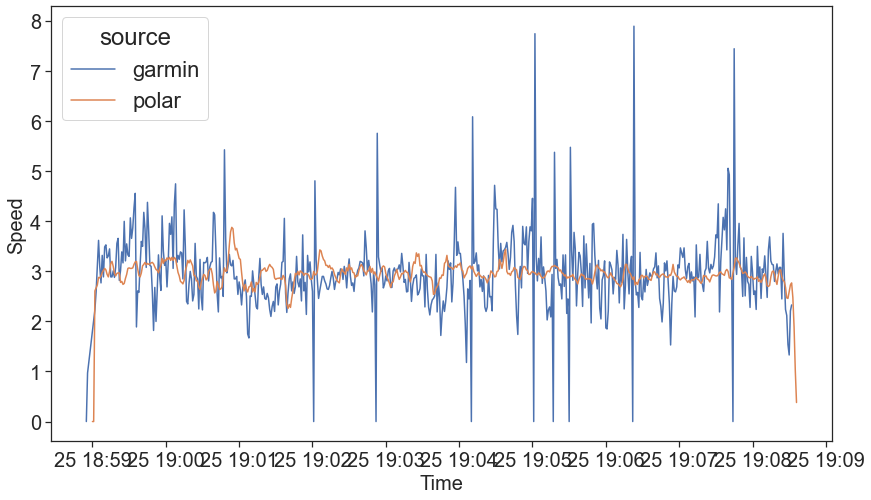

In [66]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.lineplot(data=concatenated[concatenated["hardware"] == "gps"], x="Time", y="Speed", hue="source")

In [67]:
concatenated.describe()

,Latitude,Longitude,Altitude,Speed,Heartrate,Speed_rolling_5s,Speed_rolling_10s,Speed_rolling_15s,Cadence
count,3486.000000,3486.000000,3402.000000,3483.000000,1727.000000,3447.000000,3402.000000,3357.000000,1724.000000
mean,52.130430,21.074569,112.574897,2.454198,152.616097,2.465072,2.473176,2.478726,79.121230
std,0.001736,0.002419,12.140922,1.192704,8.895638,1.140013,1.126744,1.117416,2.914098
min,52.127374,21.071322,95.400000,0.000000,87.000000,0.000000,0.000000,0.000000,27.000000
25%,52.128731,21.072187,101.700000,2.540000,152.000000,2.684000,2.737000,2.771333,79.000000
50%,52.130905,21.074367,110.500000,2.910000,154.000000,2.924000,2.936000,2.941333,80.000000
75%,52.131811,21.076797,119.800000,3.070000,157.000000,3.056000,3.043750,3.038667,80.000000
max,52.132908,21.078724,147.800000,7.900000,161.000000,4.300000,3.964000,3.782000,82.000000
